In [1]:
import src as typy

In [2]:
# sigmas = ['0.00565','0.0057','0.009','0.02']
sigmas = ['0.0057','0.009','0.02']
# sigmas = ['0.02']

In [3]:
models=[]
for sigma in sigmas:
    path = f"/work/bansil/s.sevim/0_NbSe2_Work/{sigma}/results_GMKG/"
    model = typy.epw(path=path,nk=500*500)
    models.append(model)
for model in models:
    model.load_data()

Total time: 152.1338758468628
Total time: 164.63458847999573
Total time: 181.48276209831238


In [4]:
#Band symmetry points
sym, path = typy.path_create(model.nq,[[0.0,0.0,0.0],[0.0,0.5,0.0],[1/3,1/3,0],[0.0,0.0,0.0]])

In [5]:
import matplotlib.pyplot as plt

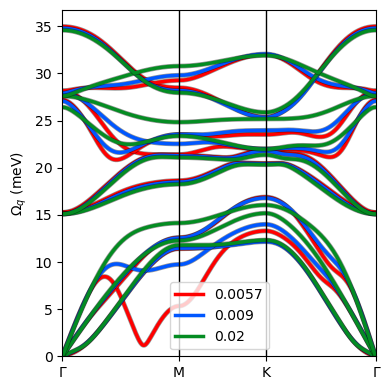

In [6]:
fig = plt.figure(figsize=(4,4))
colors=['#FF0000','#0057FF','#048C22']
for j,model in enumerate(models):
    for i in range(model.nph):
        if i==0:
            plt.plot(model.ph[i],lw=3.5,c='black',alpha=0.4)
            plt.plot(model.ph[i],c=colors[j],lw=2.5,label=sigmas[j])
        else:
            plt.plot(model.ph[i],lw=3.5,c='black',alpha=0.4)
            plt.plot(model.ph[i],c=colors[j],lw=2.5)
            
plt.xlim(0,model.nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
for i in sym[1:-1]:
    plt.axvline(i,lw=1,c='black')
plt.ylabel(r"$\Omega_q$ (meV)")
    # plt.title(r"$\Omega$")
plt.legend( )
plt.tight_layout()
plt.savefig("./Plots/ph.pdf")
plt.show()

In [7]:
import numpy as np

In [8]:
for model in models:
    model.fix_model()
    model.reduce_g()

In [9]:
models[2].ph[[1,2]]        = models[2].ph[[2,1]]
models[2].ph[[5,6]]        = models[2].ph[[6,5]]
models[2].g_complex[[1,2]] = models[2].g_complex[[2,1]]
models[2].g_complex[[5,6]] = models[2].g_complex[[6,5]]
models[2].g_sq_mean[[1,2]] = models[2].g_sq_mean[[2,1]]
models[2].g_sq_mean[[5,6]] = models[2].g_sq_mean[[6,5]]
models[2].g0[[1,2]]        = models[2].g0[[2,1]]
models[2].g0[[5,6]]        = models[2].g0[[6,5]]

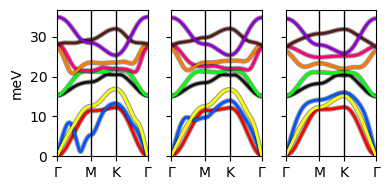

In [10]:
fig, axs = plt.subplots(1, len(models),figsize=(4,2),sharey=True)
for j,model in enumerate(models):
    #Phonon
    for i in range(model.nph):  
        axs[j].plot(model.ph[i],label=i,lw=3.5,c='black',alpha=0.4)
        axs[j].plot(model.ph[i],label=i,lw=2)
    axs[j].set_xlim(0,model.nq)
    axs[j].set_ylim(0)
    if j==0:
        axs[j].set_ylabel(r"meV")
    axs[j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[j].axvline(i,c='black',lw=1)
plt.tight_layout()
plt.savefig("./Plots/ph.pdf")
plt.show()

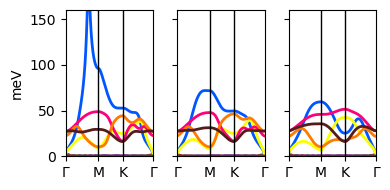

In [11]:
fig, axs = plt.subplots(1, len(models),figsize=(4,2),sharey=True)
for j,model in enumerate(models):
    #Gkq 
    for i in range(9):
        axs[j].plot(model.g_sq_mean.real[i][1:-1],label=i,lw=2)
    axs[j].set_xlim(0,model.nq)
    if j==0:
        axs[j].set_ylabel(r"meV")
    axs[j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[j].axvline(i, c='black' ,lw=1)
    axs[j].set_ylim(0,160)
    axs[j].set_xlim(0,model.nq)
# plt.legend(labelcolor='white')
plt.tight_layout()
plt.savefig("./Plots/g.pdf")
plt.show()

In [12]:
g0_array=[]
for j,model in enumerate(models):
    g0_mean = (model.g0*model.g0.conj()).mean(axis=2).real
    g0_array.append(g0_mean)

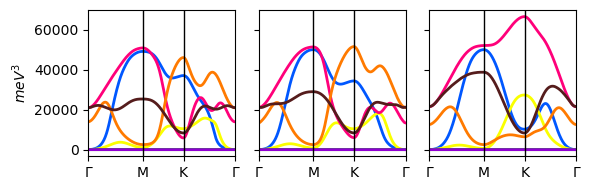

In [13]:
fig, axs = plt.subplots(1, len(models),figsize=(6,2),sharey=True)
for j,model in enumerate(models):
    # g0_mean = (model.g0*model.g0.conj()).mean(axis=2).real
    #Gkq 
    for i in range(9):
        axs[j].plot(g0_array[j][i],label=i,lw=2)
    axs[j].set_xlim(0,model.nq)
    if j==0:
        axs[j].set_ylabel(r"$meV^3$")
    # else:
        # axs[j].set_yticks([])
    axs[j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[j].axvline(i, c='black' ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[j].set_xlim(0,model.nq)
# plt.legend(labelcolor='white')
plt.tight_layout()
plt.savefig("./Plots/g0.pdf")
plt.show()

In [14]:
class gkk:
    def __init__(self,e_k,e_kq,ef,g,ph,nph,nq,nk,delta=0.000000001,T=1,U=False):
        self.e_k = e_k
        self.e_kq = e_kq
        self.nph = nph
        self.nq = nq
        self.ef = ef
        self.U=U
        self.nk=nk
        if type(ph) == int:
            self.ph = np.zeros(shape=(self.nph,self.nq))
        else:
            self.ph = ph
        self.g = g
        self.g_conj = self.g.conj()
        self.delta = delta
        self.T =T
        
    def calculate_suscep(self,q):
        top = typy.model.fd(self.e_k[q]-self.ef,T=self.T)-typy.model.fd(self.e_kq[q]-self.ef,T=self.T)
        bottom = self.e_k[q]-self.e_kq[q]-1j*self.delta
        temp_res = top/bottom
        res = temp_res.mean()
        return res
        
    def calculate_selfen(self,q):
        res = np.zeros(self.nph,dtype=complex)
        for n in range(self.nph):
            temp_res = 0 
            top = typy.model.fd(self.e_k[q]-self.ef,T=self.T)-typy.model.fd(self.e_kq[q]-self.ef,T=self.T)
            bottom = self.e_k[q]-self.e_kq[q]-1j*self.delta-self.ph[n][q]*10**-3
            suscep = top/bottom
            if self.U:
                suscep=suscep/(1-self.U*suscep)
            eph = self.g[n][q]*self.g_conj[n][q]*10**-9
            temp_res = eph*suscep
            res[n]=temp_res.mean()
        return res
   
    def calculate_selfen_matrix(self,q):
        res = np.zeros(shape=(self.nph,self.nph),dtype=complex)
        temp_res = 0 
        top = typy.model.fd(self.e_k[q]-self.ef,T=self.T)-typy.model.fd(self.e_kq[q]-self.ef,T=self.T)
        bottom = self.e_k[q]-self.e_kq[q]-1j*self.delta
        suscep = top/bottom*10**-3
        for n in range(self.nph):
            for m in range(self.nph):
                if self.U:
                    suscep=suscep/(1-self.U*suscep)
                eph = self.g[n][q]*self.g_conj[m][q]
                # eph.imag = abs(eph.imag)
                temp_res = eph*suscep
                res[n][m]=temp_res.mean()
        return res

    def calculate_selfen_limit(self,q):
        res = np.zeros(shape=(self.nph,self.nph),dtype=complex)
        temp_res = 0 
        top = typy.model.fd(self.e_k[q]-self.ef,T=self.T)-typy.model.fd(self.e_kq[q]-self.ef,T=self.T)
        bottom = self.e_k[q]-self.e_kq[q]-1j*self.delta
        suscep = top/bottom*10**-3
        if self.U:
            suscep=suscep/(1-self.U*suscep)
        for n in range(self.nph):
            for m in range(self.nph):
                if n<=m:
                    eph = self.g[n][q]*self.g_conj[m][q]
                    temp_res = eph.mean()*suscep.mean()
                    res[n][m]=temp_res
        return res
        

In [15]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

In [16]:
gkk_array=[]
for j,model in enumerate(models):
    gkk_model = gkk(e_k=model.e_k,e_kq=model.e_kq,g=model.g0,ef=model.ef,ph=0,nph=model.nph,nq=model.nq,nk=model.nk)
    res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(model.nq))
    gkk_array.append(res)

In [17]:
from scipy.ndimage import gaussian_filter1d


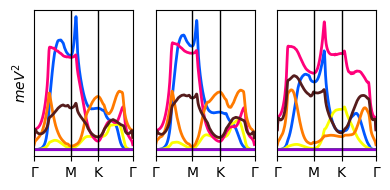

In [18]:
fig, axs = plt.subplots(1, len(models),figsize=(4,2),sharey=True)
for j,model in enumerate(models):
    for i in range(9):
        axs[j].plot(-gaussian_filter1d(np.array(gkk_array[j]).T.real[i],2),label=i,lw=2)
    axs[j].set_xlim(0,model.nq)
    if j==0:
        axs[j].set_ylabel(r"$meV^2$")
    # else:
        # axs[j].set_yticks([])
    axs[j].set_xticks(sym,["Γ","M","K","Γ"])
    axs[j].set_yticks([])
    for i in sym[1:-1]:
        axs[j].axvline(i, c='black' ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[j].set_xlim(0,model.nq)
# plt.legend(labelcolor='white')
plt.tight_layout()
plt.savefig("./Plots/pi.pdf")
plt.show()

In [19]:
selfen_matrix=[]
for j,model in enumerate(models):
    gkk_model = gkk(e_k=model.e_k,e_kq=model.e_kq,g=model.g0,ef=model.ef,ph=0,nph=model.nph,nq=model.nq,nk=model.nk)
    res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen_matrix)(i) for i in range(model.nq))
    selfen_matrix.append(res)

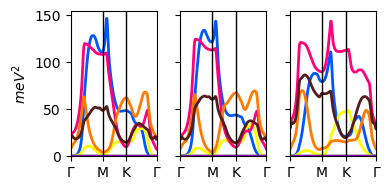

In [20]:
fig, axs = plt.subplots(1, len(models),figsize=(4,2),sharey=True)
for j,model in enumerate(models):
    for i in range(9):
        axs[j].plot(-gaussian_filter1d(np.array(selfen_matrix[j]).T.real[i][i],4),label=i,lw=2)

    axs[j].set_xlim(0,model.nq)
    if j==0:
        axs[j].set_ylabel(r"$meV^2$")
    axs[j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[j].axvline(i, c='black' ,lw=1)
    axs[j].set_xlim(0,model.nq)
# plt.legend(labelcolor='white')
plt.ylim(0,)
plt.tight_layout()
plt.savefig("./Plots/pi_matrix.pdf")
plt.show()

In [21]:
data_label = ['q_index', 'mode_1' , 'mode_2', 'Re(Pi)', 'Im(Pi)']

for k,sigma in enumerate(sigmas):
    
    model_res = np.array(selfen_matrix[k]).T
    with open(f"./outdata/{sigma}_selfen.dat", 'w') as file:
        for j,i in enumerate(data_label):
                    if j==0:
                        file.write(f"#{i:<8}")    
                    else:
                        file.write(f"{i:<9}")
        file.write("\n")
        for i in range(models[k].nph):
            for j in range(models[k].nph):
                if i<=j:
                    real_part = gaussian_filter1d(abs(model_res[i][j].real),4)
                    imag_part = gaussian_filter1d(abs(model_res[i][j].imag),4)
                else:
                    real_part = gaussian_filter1d(abs(model_res[j][i].real),4)
                    imag_part = gaussian_filter1d(-abs(model_res[i][j].imag),4)
                for q in range(models[k].nq):
                    file.write(f"{q:<8} {i:<8} {j:<8} {real_part[q]:<.6f} {imag_part[q]:<.6f} \n")

In [22]:
selfen_matrix_limit=[]
for j,model in enumerate(models):
    gkk_model = gkk(e_k=model.e_k,e_kq=model.e_kq,g=model.g_complex,ef=model.ef,ph=0,nph=model.nph,nq=model.nq,nk=model.nk)
    res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen_limit)(i) for i in range(model.nq))
    selfen_matrix_limit.append(res)

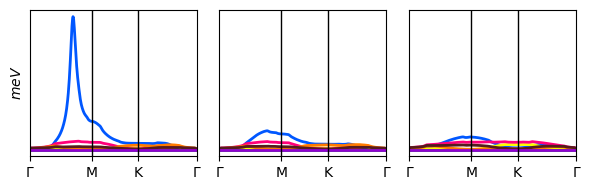

In [23]:
fig, axs = plt.subplots(1, len(models),figsize=(6,2),sharey=True)
for j,model in enumerate(models):
    for i in range(9):
        axs[j].plot(-gaussian_filter1d(np.array(selfen_matrix_limit[j]).T.real[i][i],2),label=i,lw=2)
    axs[j].set_xlim(0,model.nq)
    if j==0:
        axs[j].set_ylabel(r"$meV$")
    # else:
        axs[j].set_yticks([])
    axs[j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[j].axvline(i,c='black' ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[j].set_xlim(0,model.nq)
# plt.legend(labelcolor='white')
plt.tight_layout()
plt.savefig("./Plots/pi_limit.pdf")
plt.show()

In [24]:
selfen_matrix_limit_reduced=[]
for j,model in enumerate(models):
    gkk_model = gkk(e_k=model.e_k,e_kq=model.e_kq,g=model.g0,ef=model.ef,ph=0,nph=model.nph,nq=model.nq,nk=model.nk)
    res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen_limit)(i) for i in range(model.nq))
    selfen_matrix_limit_reduced.append(res)

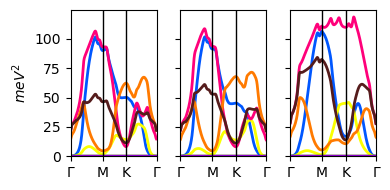

In [25]:
fig, axs = plt.subplots(1, len(models),figsize=(4,2),sharey=True)
for j,model in enumerate(models):
    for i in range(9):
        axs[j].plot(-gaussian_filter1d(np.array(selfen_matrix_limit_reduced[j]).T.real[i][i],4),label=i,lw=2)
    axs[j].set_xlim(0,model.nq)
    if j==0:
        axs[j].set_ylabel(r"$meV^2$")
    # else:
        # axs[j].set_yticks([])
    axs[j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[j].axvline(i, c='black' ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[j].set_xlim(0,model.nq)
# plt.legend(labelcolor='white')
plt.ylim(0,)
plt.tight_layout()
plt.savefig("./Plots/pi_limit_reduced.pdf")
plt.show()

In [26]:
sigmas

['0.0057', '0.009', '0.02']

In [27]:
data_label = ['q_index', 'mode_1' , 'mode_2', 'Re(Pi)', 'Im(Pi)']

for k,sigma in enumerate(sigmas):
    model_res = np.array(selfen_matrix_limit_reduced[k]).T
    with open(f"./outdata/{sigma}_selfen_limit.dat", 'w') as file:
        for j,i in enumerate(data_label):
                    if j==0:
                        file.write(f"#{i:<8}")    
                    else:
                        file.write(f"{i:<9}")
        file.write("\n")
        for i in range(models[k].nph):
            for j in range(models[k].nph):
                if i<=j:
                    real_part = gaussian_filter1d(abs(model_res[i][j].real),4)
                    imag_part = gaussian_filter1d(abs(model_res[i][j].imag),4)
                else:
                    real_part = gaussian_filter1d(abs(model_res[j][i].real),4)
                    imag_part = gaussian_filter1d(-abs(model_res[i][j].imag),4)
                for q in range(models[k].nq):
                    file.write(f"{q:<8} {i:<8} {j:<8} {real_part[q]:<.6f} {imag_part[q]:<.6f} \n")

In [28]:
data_label = ['q_index','mode', 'frequency']

for k,model in enumerate(models):
    with open(f"./outdata/{sigmas[k]}_ph.dat", 'w') as file:
        for j,i in enumerate(data_label):
                    if j==0:
                        file.write(f"#{i:<8}")    
                    else:
                        file.write(f"{i:<9}")
        file.write("\n")
        for i in range(models[k].nph):
            for q in range(models[k].nq):
                    file.write(f"{q:<8} {i:<8} {model.ph[i][q]:<.6f} \n")

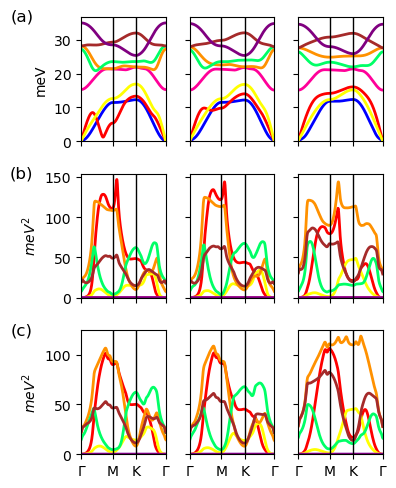

In [29]:
fig, axs = plt.subplots(3, len(models),figsize=(4,5),sharex='col', sharey='row')
c= ['blue','red','yellow','#FFFFFF','#FF0099','#FF9100','#00FF66','brown','purple']

for j,model in enumerate(models):
    #Phonon
    for i in range(model.nph):
        axs[0][j].plot(model.ph[i],label=i,lw=2,color=c[i])
    axs[0][j].set_xlim(0,model.nq)
    axs[0][j].set_ylim(0)
    if j==0:
        axs[0][j].set_ylabel(r"meV")
    axs[0][j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[0][j].axvline(i,c='black'  ,lw=1)
    axs[0][0].set_title('(a)', x=-0.7,y=0.9)


for j,model in enumerate(models):
    for i in range(9):
        axs[1][j].plot(-gaussian_filter1d(np.array(selfen_matrix[j]).T.real[i][i],4),label=i,lw=2,color=c[i])
    axs[1][j].set_ylim(0)

    axs[1][j].set_xlim(0,model.nq)
    if j==0:
        axs[1][j].set_ylabel(r"$meV^2$")
    axs[1][j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[1][j].axvline(i,c='black'  ,lw=1)
    axs[1][j].set_xlim(0,model.nq)
    axs[1][0].set_title('(b)', x=-0.7,y=0.9)

for j,model in enumerate(models):
    for i in range(9):
        axs[2][j].plot(-gaussian_filter1d(np.array(selfen_matrix_limit_reduced[j]).T.real[i][i],4),label=i,lw=2,color=c[i])
    axs[2][j].set_xlim(0,model.nq)
    if j==0:
        axs[2][j].set_ylabel(r"$meV^2$")
    # else:
        # axs[j].set_yticks([])
    # axs[2][j].set_ylim(0,)
    axs[2][j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[2][j].axvline(i,c='black'  ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[2][j].set_xlim(0,model.nq)
    axs[2][0].set_title('(c)', x=-0.7,y=0.9)

plt.ylim(0,)
plt.tight_layout()
plt.savefig("./Plots/multi_plot.pdf")
plt.show()

In [30]:
temps = [1,10,100,1000]
temp_array = [] 
for T in temps:
    suscep_array=[]
    for j,model in enumerate(models):
        gkk_model = gkk(e_k=model.e_k,e_kq=model.e_kq,g=model.g0,ef=model.ef,ph=0,nph=model.nph,nq=model.nq,nk=model.nk,T=T)
        res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_suscep)(i) for i in range(model.nq))
        suscep_array.append(res)
    temp_array.append(suscep_array)

In [31]:
temps = [1,10,100,1000]
temp_selfen_array = [] 
for T in temps:
    temp_selfen=[]
    for j,model in enumerate(models):
        gkk_model = gkk(e_k=model.e_k,e_kq=model.e_kq,g=model.g0,ef=model.ef,ph=0,nph=model.nph,nq=model.nq,nk=model.nk,T=T)
        res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen_matrix)(i) for i in range(model.nq))
        temp_selfen.append(res)
    temp_selfen_array.append(temp_selfen)

In [32]:
temps = [1,10,100,1000]
temp_selfen_limit_array = [] 
for T in temps:
    temp_selfen_limit=[]
    for j,model in enumerate(models):
        gkk_model = gkk(e_k=model.e_k,e_kq=model.e_kq,g=model.g0,ef=model.ef,ph=0,nph=model.nph,nq=model.nq,nk=model.nk,T=T)
        res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen_limit)(i) for i in range(model.nq))
        temp_selfen_limit.append(res)
    temp_selfen_limit_array.append(temp_selfen_limit)


KeyboardInterrupt



In [ ]:
np.array(temp_array).shape

In [ ]:
np.array(temp_array).shape

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(4,3),sharex="col", sharey=True)
for j,model in enumerate(models):
    # axs[k][j].plot(-gaussian_filter1d(np.array(temp_array[k][j]).real.astype(float),4),lw=4,color='white',alpha=0.5)
    axs[0].plot(-gaussian_filter1d(np.array(temp_array[0][j]).real.astype(float),4),lw=3.5,c='black',alpha=0.4)
    axs[0].plot(-gaussian_filter1d(np.array(temp_array[0][j]).real.astype(float),4),lw=2,label=sigmas[j])
    axs[0].set_xlim(0,model.nq)
    # axs[0].set_title(rf"fd(T)={temps[k]} $\sigma$={sigmas[j]} ")
    if j==0:
        axs[0].set_ylabel(r"$\chi_q$ (1/meV)")
    # else:
        # axs[j].set_yticks([])
    axs[0].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[0].axvline(i,c='black'  ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[0].set_xlim(0,model.nq)
    axs[0].legend()
for k in range(len(temps)):
    axs[1].plot(-gaussian_filter1d(np.array(temp_array[k][0]).real.astype(float),4),lw=3.5,c='black',alpha=0.4)
    axs[1].plot(-gaussian_filter1d(np.array(temp_array[k][0]).real.astype(float),4),lw=2,label=temps[k])
    axs[1].set_xlim(0,models[0].nq)
    # axs[1].set_title(rf"fd(T)={temps[k]} $\sigma$={sigmas[j]} ")
    if j==0:
        axs[1].set_ylabel(r"$1/meV$")
    # else:
        # axs[j].set_yticks([])
    axs[1].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[1].axvline(i,c='black'  ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[1].set_xlim(0,model.nq)
    axs[1].legend()






plt.ylim(0,)
plt.tight_layout()
plt.savefig("./Plots/suscep_temp.pdf")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(temps), len(models),figsize=(7,10),sharex="col", sharey=True)
for k in range(len(temps)):
    for j,model in enumerate(models):
        for i in range(9):
            # axs[k][j].plot(-gaussian_filter1d(np.array(temp_selfen_array[k][j]).T.real[i][i],4),lw=3,color='white',alpha=0.5)
            axs[k][j].plot(-gaussian_filter1d(np.array(temp_selfen_array[k][j]).T.real[i][i],4),label=i,lw=1.5)
        axs[k][j].set_xlim(0,model.nq)
        axs[k][j].set_title(rf"fd(T) = {temps[k]} $\sigma$ = {sigmas[j]} ")

        if j==0:
            axs[k][j].set_ylabel(r"$meV^2$")
        # else:
            # axs[j].set_yticks([])
        axs[k][j].set_xticks(sym,["Γ","M","K","Γ"])
        for i in sym[1:-1]:
            axs[k][j].axvline(i,c='black'  ,lw=1)
        # axs[j].set_ylim(0,160)
        axs[k][j].set_xlim(0,model.nq)
    # plt.legend(labelcolor='white')
plt.ylim(0,)
plt.tight_layout()
plt.savefig("./Plots/selfen_temp.pdf")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(temps), len(models),figsize=(7,10),sharex="col", sharey=True)
for k in range(len(temps)):
    for j,model in enumerate(models):
        for i in range(9):
            axs[k][j].plot(-gaussian_filter1d(np.array(temp_selfen_limit_array[k][j]).T.real[i][i],4),label=i,lw=2)
        axs[k][j].set_xlim(0,model.nq)
        axs[k][j].set_title(rf"fd(T) = {temps[k]} $\sigma$ = {sigmas[j]} ")
        if j==0:
            axs[k][j].set_ylabel(r"$meV^2$")
        # else:
            # axs[j].set_yticks([])
        axs[k][j].set_xticks(sym,["Γ","M","K","Γ"])
        for i in sym[1:-1]:
            axs[k][j].axvline(i, c='black' ,lw=1)
        # axs[j].set_ylim(0,160)
        axs[k][j].set_xlim(0,model.nq)
    # plt.legend(labelcolor='white')
plt.ylim(0,)
plt.tight_layout()
plt.savefig("./Plots/selfen_limit_temp.pdf")
plt.show()

In [ ]:
fig, axs = plt.subplots(3, len(models),figsize=(4,5),sharex='col', sharey='row')
for j,model in enumerate(models):
    #Phonon
    for i in range(model.nph):
        axs[0][j].plot(model.ph[i],label=i,lw=2,color=c[i])
    axs[0][j].set_xlim(0,model.nq)
    axs[0][j].set_ylim(0)
    if j==0:
        axs[0][j].set_ylabel(r"meV")
    axs[0][j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[0][j].axvline(i, c='black' ,lw=1)
    axs[0][0].set_title('(a)', x=-0.7,y=0.9)


for j,model in enumerate(models):
    for i in range(9):
        axs[1][j].plot(-gaussian_filter1d(np.array(selfen_matrix[j]).T.real[i][i],4),label=i,lw=2,color=c[i])
    axs[1][j].set_ylim(0)

    axs[1][j].set_xlim(0,model.nq)
    if j==0:
        axs[1][j].set_ylabel(r"$meV^2$")
    axs[1][j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[1][j].axvline(i,c='black'  ,lw=1)
    axs[1][j].set_xlim(0,model.nq)
    axs[1][0].set_title('(b)', x=-0.7,y=0.9)

for j,model in enumerate(models):
    for i in range(9):
        axs[2][j].plot(-gaussian_filter1d(np.array(selfen_matrix_limit_reduced[j]).T.real[i][i],4),label=i,lw=2,color=c[i])
    axs[2][j].set_xlim(0,model.nq)
    if j==0:
        axs[2][j].set_ylabel(r"$meV^2$")
    # else:
        # axs[j].set_yticks([])
    # axs[2][j].set_ylim(0,)
    axs[2][j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[2][j].axvline(i, c='black' ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[2][j].set_xlim(0,model.nq)
    axs[2][0].set_title('(c)', x=-0.7,y=0.9)

plt.ylim(0,)
plt.tight_layout()
plt.savefig("./Plots/multi_plot.pdf")
plt.show()

In [ ]:
path_tile = np.tile(np.arange(model.nq),9)
selfen_tile = np.zeros(shape=(len(models),model.nph,model.nq))
fig, axs = plt.subplots(1, len(models),figsize=(6,2),sharey=True)

for j,model in enumerate(models):
    for i in range(model.nph):
        selfen_tile[j][i] = -np.array(selfen_matrix)[j].T[i][i].real.flatten()
min_, max_ = selfen_tile.min(), selfen_tile.max()

for j,model in enumerate(models):
    for i in range(model.nph):    
        ph_tile = model.ph.flatten()
        #Phonon
        im = axs[j].scatter(path_tile,ph_tile,c=selfen_tile[j],vmin=min_, vmax=max_,s=1,cmap='magma')
        axs[j].set_xlim(0,model.nq)
        axs[j].set_ylim(0)
        if j==0:
            axs[j].set_ylabel(r"meV")
        axs[j].set_xticks(sym,["Γ","M","K","Γ"])
        for i in sym[1:-1]:
            axs[j].axvline(i, c='black' ,lw=1)
fig.colorbar(im, ax=axs)
# fig.colorbar()
# fig.colorbar(axs[2],ax=axs.ravel().tolist())
# plt.tight_layout()
plt.savefig("./Plots/selfen_spectral.pdf")
plt.show()

In [ ]:
path_tile = np.tile(np.arange(model.nq),9)
selfen_tile = np.zeros(shape=(len(models),model.nph,model.nq))
fig, axs = plt.subplots(1, len(models),figsize=(6,2),sharey=True)

for j,model in enumerate(models):
    for i in range(model.nph):
        selfen_tile[j][i] = -np.array(selfen_matrix_limit_reduced)[j].T[i][i].real.flatten()
min_, max_ = selfen_tile.min(), selfen_tile.max()

for j,model in enumerate(models):
    for i in range(model.nph):    
        ph_tile = model.ph.flatten()
        #Phonon
        im = axs[j].scatter(path_tile,ph_tile,c=selfen_tile[j],vmin=min_, vmax=max_,s=1,cmap='magma')
        axs[j].set_xlim(0,model.nq)
        axs[j].set_ylim(0)
        if j==0:
            axs[j].set_ylabel(r"meV")
        axs[j].set_xticks(sym,["Γ","M","K","Γ"])
        for i in sym[1:-1]:
            axs[j].axvline(i, c='black' ,lw=1)
fig.colorbar(im, ax=axs)
# fig.colorbar()
# fig.colorbar(axs[2],ax=axs.ravel().tolist())
# plt.tight_layout()
plt.savefig("./Plots/selfen_limit_spectral.pdf")
plt.show()

In [ ]:

fig, axs = plt.subplots(1, len(models),figsize=(6,2),sharey=True)

for j,model in enumerate(models):
    for i in range(model.nph):
        selfen_tile[j][i] = -np.array(selfen_matrix)[j].T[i][i].real.flatten()
min_, max_ = selfen_tile.min(), selfen_tile.max()

for j,model in enumerate(models):
    for i in range(model.nph):    
        ph_tile = model.ph.flatten()
        #Phonon
        im = axs[j].scatter(path_tile,ph_tile,c=selfen_tile[j],vmin=min_, vmax=max_,s=1,cmap='magma')
        axs[j].set_xlim(0,model.nq)
        axs[j].set_ylim(0)
        if j==0:
            axs[j].set_ylabel(r"meV")
        axs[j].set_xticks(sym,["Γ","M","K","Γ"])
        for i in sym[1:-1]:
            axs[j].axvline(i,c='black'  ,lw=1)
fig.colorbar(im, ax=axs)

In [ ]:
fig, axs = plt.subplots(2, len(models),figsize=(4,4),sharex='col', sharey='row')
c= ['blue','red','yellow','#FFFFFF','#FF0099','#FF9100','#00FF66','brown','purple']
path_tile = np.tile(np.arange(model.nq),9)
selfen_tile = np.zeros(shape=(len(models),model.nph,model.nq))

for j,model in enumerate(models):
    for i in range(model.nph):
        selfen_tile[j][i] = -np.array(selfen_matrix)[j].T[i][i].real.flatten()
min_, max_ = selfen_tile.min(), selfen_tile.max()

for j,model in enumerate(models):
    for i in range(model.nph):    
        ph_tile = model.ph.flatten()
        #Phonon
        im = axs[0][j].scatter(path_tile,ph_tile,c=selfen_tile[j],vmin=min_, vmax=max_,s=1,cmap='magma')
    axs[0][j].scatter(path_tile,ph_tile,c=selfen_tile[j],vmin=min_, vmax=max_,s=1,cmap='magma')
    axs[0][j].set_xlim(0,model.nq)
    axs[0][j].set_ylim(0)
    if j==0:
        axs[0][j].set_ylabel(r"meV")
    axs[0][j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[0][j].axvline(i, c='black' ,lw=1)
    axs[0][0].set_title('(a)', x=-0.7,y=0.9)


for j,model in enumerate(models):
    for i in range(model.nph):
        selfen_tile[j][i] = -np.array(selfen_matrix_limit_reduced)[j].T[i][i].real.flatten()
min_, max_ = selfen_tile.min(), selfen_tile.max()


for j,model in enumerate(models):
    for i in range(9):
        ph_tile = model.ph.flatten()
        im = axs[1][j].scatter(path_tile,ph_tile,c=selfen_tile[j],vmin=min_, vmax=max_,s=1,cmap='magma')
    axs[1][j].set_ylim(0)

    axs[1][j].set_xlim(0,model.nq)
    if j==0:
        axs[1][j].set_ylabel(r"$meV^2$")
    axs[1][j].set_xticks(sym,["Γ","M","K","Γ"])
    for i in sym[1:-1]:
        axs[1][j].axvline(i,c='black'  ,lw=1)
    axs[1][j].set_xlim(0,model.nq)
    axs[1][0].set_title('(b)', x=-0.7,y=0.9)

plt.ylim(0,)
plt.tight_layout()
plt.savefig("./Plots/spectrum.png")
plt.show()